In [14]:
import osmnx as ox, geopandas as gpd, pandas as pd, networkx as nx
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)

In [15]:
# Configure the inline image display
img_folder = 'images'
extension = 'png'
size = 480

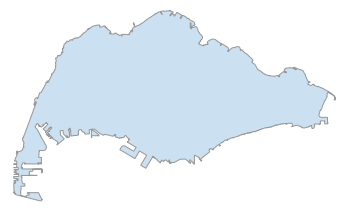

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x141d1c89588>)

In [16]:
# Getting the shape file of Singapore from OpenStreetMap
city = ox.gdf_from_place('Singapore')
ox.plot_shape(ox.project_gdf(city))

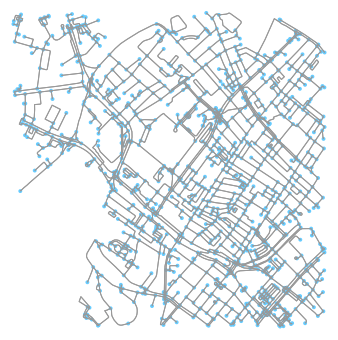

(<Figure size 428.897x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1420b936710>)

In [17]:
G = ox.graph_from_address('1 Hampshire Road, Singapore, Singapore', network_type='walk')
ox.plot_graph(G)

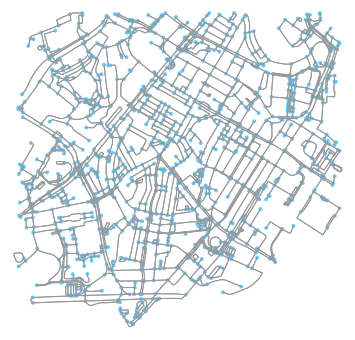

(<Figure size 452.075x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x141e2e04978>)

In [18]:
G = ox.graph_from_address('45 Maxwell Road, Singapore, Singapore', network_type='walk')
ox.plot_graph(G)

In [20]:
# function
def make_plot(place, point, network_type='walk', bldg_color='orange', dpi=40,
              dist=1000, default_width=4, street_widths=None):
    gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
    fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width,
                                    street_widths=street_widths, save=False, show=False, close=True)
    fig, ax = ox.footprints.plot_footprints(gdf, fig=fig, ax=ax, color=bldg_color, set_bounds=False,
                                save=True, show=False, close=True, filename=place, dpi=dpi)

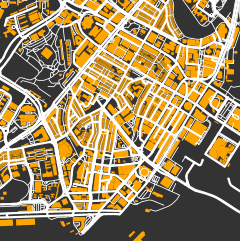

In [21]:
place = 'singapore_ura'
point = (1.279560, 103.845383)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

In [22]:
my_google_elevation_api_key = 'YOUR_API_KEY'
import networkx as nx
import numpy as np
import osmnx as ox
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.10'

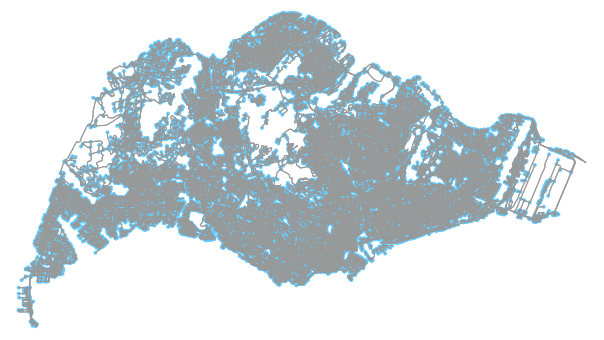

(<Figure size 781.682x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x141d5c920f0>)

In [23]:
# Singapore Street Network
G = ox.graph_from_place('Singapore, Singapore', network_type='walk')
ox.plot_graph(G)

In [24]:
# Add elevation to each of the nodes, using the google elevation API, then calculate edge grades
G = ox.add_node_elevations(G, my_google_elevation_api_key)
G = ox.add_edge_grades(G)

In [25]:
edge_grades = [data['grade_abs'] for u, v, k, data in ox.get_undirected(G).edges(keys=True, data=True)]

In [26]:
avg_grade = np.mean(edge_grades)
print('Average street grade in {} is {:.1f}%'.format(place, avg_grade*100))

med_grade = np.median(edge_grades)
print('Median street grade in {} is {:.1f}%'.format(place, med_grade*100))

Average street grade in singapore_ura is 2.4%
Median street grade in singapore_ura is 1.6%


In [27]:
# project the street network to UTM
G_proj = ox.project_graph(G)

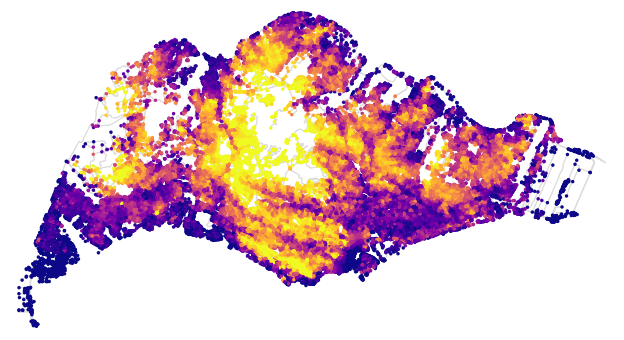

In [28]:
# get one color for each node, by elevation, then plot the network
nc = ox.get_node_colors_by_attr(G_proj, 'elevation', cmap='plasma', num_bins=20)
fig, ax = ox.plot_graph(G_proj, fig_height=6, node_color=nc, node_size=12, node_zorder=2, edge_color='#dddddd')